<a href="https://colab.research.google.com/github/archivesunleashed/notebooks/blob/main/arch/web-graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Graph Dataset Exploration

We're going to take a look at a few examples of how we can explore the Web Graph dataset. 

The first thing we need to do is enter the URL for our Web Graph dataset in the cell below. You can get this by right clicking the Download icon, and selecting "Copy Link".

In [1]:
dataset = 'https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-14489/WebGraphExtraction/web-graph.csv.gz?access=YKTETCNKYUWWRGXL72CPIVRR52D6YXSB' #@param {type:"string"}
print(dataset)

https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-14489/WebGraphExtraction/web-graph.csv.gz?access=YKTETCNKYUWWRGXL72CPIVRR52D6YXSB


## pandas

Next, we'll setup our environment so we can load our Web Graph dataset into [pandas](https://pandas.pydata.org) DataFrames. If you're unfamiliar with DataFrames, but you've worked with Spreadsheets before, you should feel comfortable pretty quick.

In [2]:
import pandas as pd

# Data Table Display

Colab includes an extension that renders pandas dataframes into interactive displays that can be filtered, sorted, and explored dynamically. This can be very useful for taking a look at what each DataFrame provides!

Data table display for pandas DataFrames can be enabled by running:
```python
%load_ext google.colab.data_table
```
and disabled by running
```python
%unload_ext google.colab.data_table
```

In [3]:
%load_ext google.colab.data_table

## Loading our ARCH Dataset as a DataFrame

---


Next, we'll create pandas DataFrame from our dataset, and show a preview of it using the Data Table Display.

In [4]:
web_graph = pd.read_csv(dataset, compression='gzip')
web_graph

,crawl_date,source,target,anchor_text
0,20200629191652,https://www.ualberta.ca/index.html,https://www.ualberta.ca,NaN
1,20200629191652,https://www.ualberta.ca/index.html,https://apps.ualberta.ca/directory,Find a Person
2,20200629191652,https://www.ualberta.ca/index.html,https://www.onecard.ualberta.ca/,ONEcard
3,20200629191652,https://www.ualberta.ca/index.html,https://www.beartracks.ualberta.ca/,Bear Tracks
4,20200629191652,https://www.ualberta.ca/index.html,https://www.ualberta.ca/maps,Maps
...,...,...,...,...
56910687,20220704195427,https://www.uwo.ca/theory/,https://instagram.com/westernuniversity,NaN
56910688,20220704195427,https://www.uwo.ca/theory/,https://www.youtube.com/user/ArtsUWO,NaN
56910689,20220704195427,https://www.uwo.ca/theory/,https://www.linkedin.com/edu/school?id=10852,NaN
56910690,20220704195427,https://www.uwo.ca/theory/,https://twitter.com/westernuArts,NaN


## Examining the Web Graph




### What are the most frequent `source` and `target` combinations?

In [5]:
top_links = web_graph[["source", "target"]].value_counts().head(10).reset_index()
top_links.columns = ["source", "target", "count"]
top_links

,source,target,count
0,http://casa.cpsc.ucalgary.ca/javadoc/org/armed...,http://casa.cpsc.ucalgary.ca/javadoc/org/armed...,2965
1,http://casa.cpsc.ucalgary.ca/javadoc/org/armed...,http://casa.cpsc.ucalgary.ca/javadoc/org/armed...,2164
2,https://www.epfl.ch/labs/disopt/page-10520-en-...,https://www.epfl.ch/labs/disopt/page-10520-en-...,1709
3,http://casa.cpsc.ucalgary.ca/javadoc/org/armed...,http://casa.cpsc.ucalgary.ca/javadoc/org/armed...,1439
4,https://wiki.math.uwaterloo.ca/fluidswiki/api....,https://wiki.math.uwaterloo.ca/fluidswiki/api....,1179
5,http://compneuro.uwaterloo.ca/publications.html,http://compneuro.uwaterloo.ca/publications.html#,1066
6,http://people.ucalgary.ca/~mmcgilli/ASPR/GenAB...,http://people.ucalgary.ca/~mmcgilli/ASPR/ASPRg...,980
7,https://scpa.ucalgary.ca/manageprofile/profile...,https://scpa.ucalgary.ca/manageprofile/profile...,898
8,https://beehive.uwaterloo.ca/pools/hockey1920/...,http://espn.go.com/nhl/injuries,831
9,https://geog.ucalgary.ca/manageprofile/profile...,https://geog.ucalgary.ca/manageprofile/profile...,817


## Can we create a network graph visualization with the data we have?

Yes! We can take advantage [NetworkX](https://networkx.org/documentation/stable/index.html) to create some basic graphs.

NetworkX is *really* powerful, so there is a lot more that can be done with it than what we're demonstrating here.

First we'll import `networkx` as well as `matplotlib.pyplot`.

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

We can take advantage of [`from_pandas_edgelist`](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html) here since our three graph derivatives are edge tables, and initialize our graph.


In [7]:
G = nx.from_pandas_edgelist(
    top_links, source="source", target="target", edge_key="target", edge_attr="count"
)

Setup our graph and draw it!


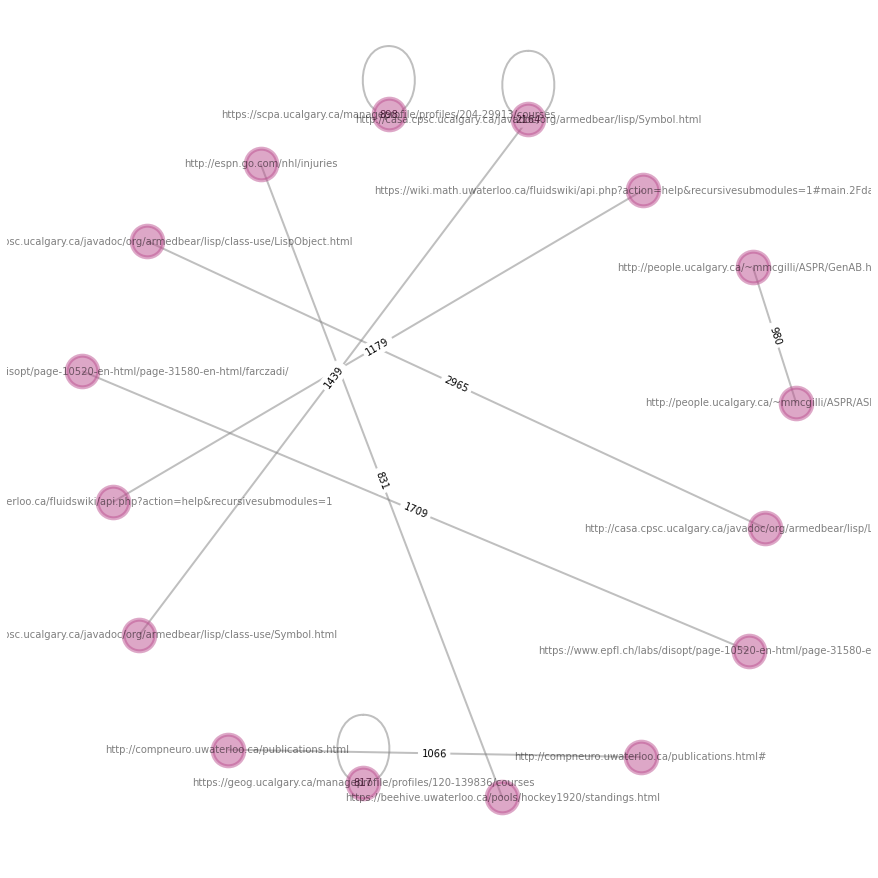

In [8]:
pos = nx.spring_layout(G, k=15)
options = {
    "node_size": 1000,
    "node_color": "#bc5090",
    "node_shape": "o",
    "alpha": 0.5,
    "linewidths": 4,
    "font_size": 10,
    "font_color": "black",
    "width": 2,
    "edge_color": "grey",
}

plt.figure(figsize=(12, 12))

nx.draw(G, pos, with_labels=True, **options)

labels = {e: G.edges[e]["count"] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()